In [1]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

proxies = {'http':''}

recon_time = 130

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/topology/plate_boundaries/?time=%0.2f' % recon_time,
                 proxies=proxies)
tpb = json.loads(r.text)

print tpb


{u'type': u'FeatureCollection', u'features': [{u'geometry': {u'type': u'MultiLineString', u'coordinates': [[[24.77, -52.08], [24.95, -51.8], [25.4, -51.11], [25.83, -50.42], [26.36, -49.54], [26.88, -48.66], [27.33, -47.84], [27.78, -47.02], [28.05, -46.51], [28.32, -45.99], [28.66, -45.36], [28.99, -44.72], [29.45, -43.79], [29.9, -42.86], [30.31, -41.98], [30.71, -41.11], [31.1, -40.22], [31.48, -39.34], [31.86, -38.46], [32.12, -37.82], [32.37, -37.18], [33.33, -37.45], [34.29, -37.71], [35.26, -37.96], [35.44, -37.25], [35.61, -36.55], [35.78, -35.85], [36.53, -36.0], [36.7, -35.48], [37.72, -35.62], [38.75, -35.74], [39.78, -35.86], [40.81, -35.97], [41.85, -36.06], [42.05, -35.31], [42.25, -34.57], [42.44, -33.82], [42.63, -33.06], [42.86, -32.2], [43.08, -31.33], [43.29, -30.46]]]}, u'Length': 0.55, u'type': u'Feature', u'feature_type': u'gpml:MidOceanRidge'}, {u'geometry': {u'type': u'MultiLineString', u'coordinates': [[[-21.08, 72.04], [-19.67, 72.02], [-17.16, 71.7], [-14.8, 

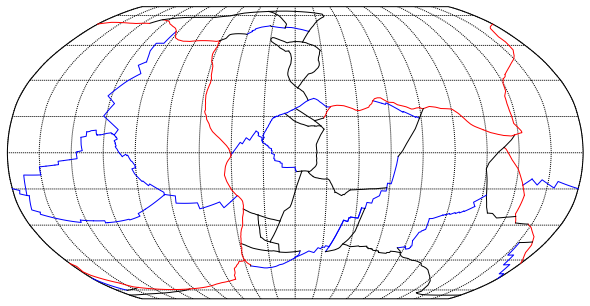

In [3]:
fig = plt.figure(figsize=(10,5))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='robin',lon_0=0.,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))

for feature in tpb['features']:
    #print feature['geometry']
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    if feature['feature_type']=='gpml:SubductionZone':
        m.plot(x,y,'r')
    elif feature['feature_type']=='gpml:MidOceanRidge':
        m.plot(x,y,'b')
    else:
        m.plot(x,y,'k')
    
plt.show()


    